In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
sales=pd.read_excel(r"E:\data\sale2018.xlsx")

In [15]:
sales.head()

,客户简称,部门,业务员,品 名,日期,销货数量,单价
0,网御星云,业务一部,张勇亮,NAP-8865-LX-71整机,2018-01-22,5,8600.0
1,网御星云,业务二部,尹海洋,NAP-8865-LX-71整机,2018-05-21,5,8526.5
2,网御星云,业务一部,尹海洋,NAP-8865-LX-71整机,2018-06-15,5,8526.5
3,网御星云,业务一部,尹海洋,NAP-8865X-LX-77整机,2018-06-19,5,11000.0
4,网御星云,业务一部,尹海洋,NAP-8865X-LX-77整机,2018-06-19,1,11000.0


In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 7 columns):
客户简称    13903 non-null object
部门      13903 non-null object
业务员     13903 non-null object
品  名    13903 non-null object
日期      13903 non-null object
销货数量    13903 non-null int64
单价      13903 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 760.4+ KB


In [17]:
#或sales['销货额']=sales['销货数量']*sales['单价']
sales=sales.assign(销货额=sales['销货数量']*sales['单价'])

In [18]:
sales.head(2)

,客户简称,部门,业务员,品 名,日期,销货数量,单价,销货额
0,网御星云,业务一部,张勇亮,NAP-8865-LX-71整机,2018-01-22,5,8600.0,43000.0
1,网御星云,业务二部,尹海洋,NAP-8865-LX-71整机,2018-05-21,5,8526.5,42632.5


In [19]:
sales=sales.sort_values(by='销货额',ascending=False)
sales.head()

,客户简称,部门,业务员,品 名,日期,销货数量,单价,销货额
13685,绿盟科技,大客户部,陈士明,HTCA-6600-SZLM-81整机（新）,2018-10-24,4,338004.00,1352016.00
7226,网神,大客户部,李艳龙,NAP-8896-360-12整机(新),2018-12-25,20,51800.00,1036000.00
1202,网神,业务一部,刘坤,NAP-8895-WSXX-66整机（快）,2018-01-15,30,30180.00,905400.00
13687,绿盟科技,大客户部,陈士明,HTCA-6600-SZLM-85整机（新）,2018-12-01,3,293931.00,881793.00
6471,启明星辰,业务一部,尹海洋,NAP-8865-QMXC-86整机,2018-07-02,37,21811.97,807042.89


#一级标题
##二级标题
###三级标题
####四级标题
标题

In [20]:
#更新版本后的交易量，留存率。使用了什么功能，对应用户的留存率更高，产品可重点优化此功能

In [21]:
sales['日期']=pd.to_datetime(sales['日期']) 
sales['日期'].dtype

dtype('<M8[ns]')

In [22]:
sales=sales.set_index('日期')
sales=sales.to_period('M')
sales.groupby(['日期','部门']).apply(lambda x:x.sort_values('销货额',ascending=False)[:3]) 

客户简称     部门  业务员  \
日期      部门    日期                          
2018-01 上海业务部 2018-01  安恒信息  上海业务部   杨恒   
              2018-01  格尔软件  上海业务部   杨恒   
              2018-01  格尔软件  上海业务部   杨恒   
        业务一部  2018-01    网神   业务一部   刘坤   
              2018-01  启明星辰   业务一部  张勇亮   
              2018-01  启明星辰   业务一部  张勇亮   
        业务三部  2018-01   天融信   业务三部  李艳龙   
              2018-01   天融信   业务三部  李艳龙   
              2018-01   天融信   业务三部  李艳龙   
        业务二部  2018-01    浪潮   业务二部  尹海洋   
        售后服务部 2018-01    网神  售后服务部  刘宇思   
              2018-01  安恒信息  售后服务部  刘宇思   
              2018-01   金文凯  售后服务部  刘宇思   
        大客户部  2018-01  东软集团   大客户部  苏冠群   
              2018-01  东软集团   大客户部  苏冠群   
              2018-01  东软集团   大客户部  苏冠群   
        深圳业务部 2018-01   深信服  深圳业务部  李延刚   
              2018-01   深信服  深圳业务部  李延刚   
              2018-01   深信服  深圳业务部  李延刚   
2018-02 上海业务部 2018-02  安恒信息  上海业务部   杨恒   
              2018-02  中新网络  上海业务部   杨恒   
              2018-02  安恒信息  上海业务部   杨恒   
        业务一部  2018-02  启明星辰   业务一部  张勇亮   
              2018-02  网御星云   业务一部  张勇亮   
              2018-02  网御星云   业务一部  张勇亮   
        业务三部  2018-02   天融信   业务三部  李艳龙   
              2018-02  绿盟科技   业务三部  陈士明   
              2018-02  绿盟科技   业务三部  陈士明   
        业务二部  2018-02    网神   业务二部  李艳龙   
              2018-02    网神   业务二部  李艳龙   
...                     ...    ...  ...   
2018-11 上海业务部 2018-11  安恒信息  上海业务部   杨恒   
        业务一部  2018-11  启明星辰   业务一部  尹海洋   
              2018-11  启明星辰   业务一部  尹海洋   
              2018-11  启明星辰   业务一部  尹海洋   
        业务三部  2018-11   天融信   业务三部   李沛   
              2018-11   天融信   业务三部   李沛   
              2018-11  绿盟科技   业务三部  陈士明   
        业务二部  2018-11   天融信   业务二部   李沛   
              2018-11   天融信   业务二部   李沛   
        大客户部  2018-11  网御星云   大客户部  尹海洋   
              2018-11  网御星云   大客户部  尹海洋   
              2018-11    网神   大客户部  李艳龙   
        深圳业务部 2018-11   深信服  深圳业务部  李延刚   
              2018-11   深信服  深圳业务部  李延刚   
              2018-11   深信服  深圳业务部  李延刚   
2018-12 上海业务部 2018-12  安恒信息  上海业务部   杨恒   
              2018-12  安恒信息  上海业务部   杨恒   
              2018-12   赛特斯  上海业务部   杨恒   
        业务一部  2018-12  山石网科   业务一部  李艳龙   
              2018-12  山石网科   业务一部  李艳龙   
              2018-12  山石网科   业务一部  李艳龙   
        业务三部  2018-12   天融信   业务三部   李沛   
              2018-12  绿盟科技   业务三部  陈士明   
              2018-12  绿盟科技   业务三部  陈士明   
        大客户部  2018-12    网神   大客户部  李艳龙   
              2018-12  绿盟科技   大客户部  陈士明   
              2018-12   天融信   大客户部   李沛   
        深圳业务部 2018-12  蓝盾股份  深圳业务部  陈育坚   
              2018-12   深信服  深圳业务部  李延刚   
              2018-12   深信服  深圳业务部  李延刚   

                                                                  品  名  销货数量  \
日期      部门    日期                                                               
2018-01 上海业务部 2018-01                            NAP-8866-HZAH-45整机（新）    15   
              2018-01                              NAP-8895-SHGE-121整机     5   
              2018-01                              NAP-8895-SHGE-121整机     5   
        业务一部  2018-01                            NAP-8895-WSXX-66整机（快）    30   
              2018-01                           NAP-7582o-WYXY-23整机（新）    45   
              2018-01                            FW-7510-QMXC-129整机（新）   192   
        业务三部  2018-01                              FW-7576-TRX-42整机（新）    93   
              2018-01                                  模块总成TRX 8895两万兆   100   
              2018-01                                NAP-8895-TRX-25整机    13   
        业务二部  2018-01                               NAP-8895-LCBJ-01整机     5   
        售后服务部 2018-01                                               机箱     2   
              2018-01                                               电源     1   
              2018-01                                              &主板     1   
        大客户部  2018-01                           NAP-7566-DRRJ-156整机(快)    72   
              2018-01            

In [24]:
sales2=sales.groupby(['日期','部门'])['销货额'].sum()
sales2.head(5)

日期       部门   
2018-01  上海业务部     1078825.00
         业务一部     12146599.14
         业务三部      4496190.00
         业务二部        47500.00
         售后服务部        8450.00
Name: 销货额, dtype: float64

In [25]:
plt.rcParams['font.sans-serif']=['SimHei']

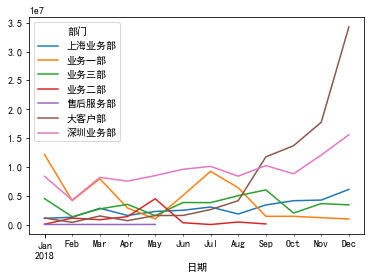

In [26]:
sales2.unstack().plot()